In [16]:
import tensorflow as tf

tf.__version__

'2.4.1'

In [17]:
tf.test.gpu_device_name()

'/device:GPU:0'

In [18]:
import keras

keras.__version__

'2.4.3'

In [19]:
from keras.datasets import mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [20]:
print(len(X_train))
print(X_train.shape)  # 6만개 데이터의 28 X 28사이즈의 이미지

print(len(y_train))
print(y_train[:5])

60000
(60000, 28, 28)
60000
[5 0 4 1 9]


In [21]:
import numpy as np
unique_elements, counts_elements = np.unique(y_train, return_counts=True)
unique_elements

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [22]:
print(len(X_test))
print(X_test.shape)  # 6만개 데이터의 28 X 28사이즈의 이미지

print(len(y_test))
print(y_test[:5])

10000
(10000, 28, 28)
10000
[7 2 1 0 4]


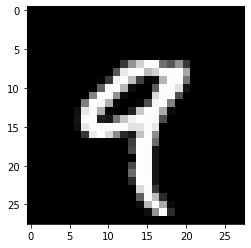

In [23]:
import matplotlib.pyplot as plt

digit = X_train[4]
plt.imshow(digit, cmap='gray')
plt.show()

In [24]:
import numpy as np

np.set_printoptions(linewidth = 150)

print(X_train[4])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0  55 148 210 253 253 113  87 148  55   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  87 232 252 253 189 210 252 252 25

In [25]:
X_train = X_train.reshape((60000, 28*28))  # (60000, 28, 28) -> (60000, 784)
X_test = X_test.reshape((10000, 28*28))

X_train.shape, X_test.shape

((60000, 784), (10000, 784))

In [26]:
y_train.shape

(60000,)

In [27]:
X_train = X_train.astype(float)/255
X_test = X_test.astype(float)/255

print(X_train[4])

[0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0. 

In [28]:
from keras.utils import to_categorical

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

print(y_train[:5])

[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


In [31]:
print(y_train.shape)

(60000, 10)


In [34]:
from keras import models
from keras import layers

mnist = models.Sequential()
mnist.add(layers.Dense(512, activation = 'relu', input_shape=(28*28,)))
mnist.add(layers.Dense(256, activation = 'relu'))
mnist.add(layers.Dense(10, activation='softmax'))


In [35]:
mnist.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_2 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                2570      
Total params: 535,818
Trainable params: 535,818
Non-trainable params: 0
_________________________________________________________________


In [36]:
mnist.compile(loss='categorical_crossentropy',
              optimizer = 'rmsprop',
              metrics=['accuracy'])

In [37]:
%%time

Hist = mnist.fit(X_train, y_train, epochs=100, batch_size=128, validation_split=0.2)

Epoch 1/100
375/375 [==============================] - 4s 4ms/step - loss: 0.4588 - accuracy: 0.8608 - val_loss: 0.1424 - val_accuracy: 0.9581
Epoch 2/100
375/375 [==============================] - 1s 3ms/step - loss: 0.0983 - accuracy: 0.9703 - val_loss: 0.1006 - val_accuracy: 0.9707
Epoch 3/100
375/375 [==============================] - 1s 3ms/step - loss: 0.0587 - accuracy: 0.9814 - val_loss: 0.0852 - val_accuracy: 0.9749
Epoch 4/100
375/375 [==============================] - 1s 3ms/step - loss: 0.0383 - accuracy: 0.9879 - val_loss: 0.0876 - val_accuracy: 0.9753
Epoch 5/100
375/375 [==============================] - 1s 3ms/step - loss: 0.0290 - accuracy: 0.9908 - val_loss: 0.0907 - val_accuracy: 0.9768
Epoch 6/100
375/375 [==============================] - 1s 3ms/step - loss: 0.0201 - accuracy: 0.9939 - val_loss: 0.0906 - val_accuracy: 0.9778
Epoch 7/100
375/375 [==============================] - 1s 3ms/step - loss: 0.0143 - accuracy: 0.9957 - val_loss: 0.1037 - val_accuracy: 0.9794

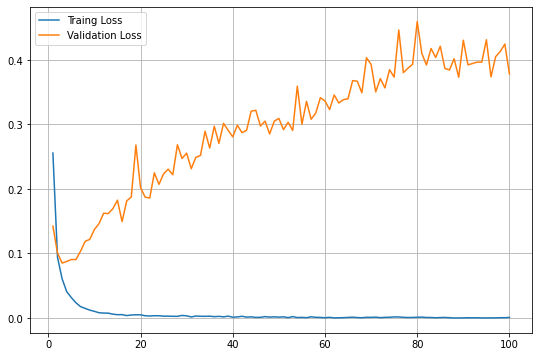

In [38]:
import matplotlib.pyplot as plt

epochs = range(1, len(Hist.history['loss']) + 1)

plt.figure(figsize=(9,6))
plt.plot(epochs, Hist.history['loss'])
plt.plot(epochs, Hist.history['val_loss'])
plt.legend(['Traing Loss','Validation Loss'])
plt.grid()
plt.show()

In [40]:
loss, accuracy = mnist.evaluate(X_test, y_test)
print(loss, accuracy)

313/313 [==============================] - 1s 2ms/step - loss: 0.3499 - accuracy: 0.9834
0.3499223291873932 0.9833999872207642


In [41]:
np.set_printoptions(suppress=True, precision = 9)
print(mnist.predict(X_test[:1,:]))

[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]]


In [42]:
print(mnist.predict_classes(X_test[:1,:]))

[7]


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
